In [1]:
import numpy as np
import pandas as pd
from pandas.core.internals.blocks import F
import numpy as np
import pandas as pd
from datetime import datetime
#from google.colab import drive
from zipfile import ZipFile
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 36.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.1.post1
    Uninstalling scikit-learn-1.4.1.post1:
      Successfully uninstalled scikit-learn-1.4.1.post1
Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import neighbors, datasets
#from sklearn.inspection import DecisionBoundaryDisplay
import sklearn.metrics
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
#drive.mount('/content/drive')

In [ ]:
# To confirm the drive is properly mounted, let's list to show outline and contents.
#!ls drive/MyDrive/

In [4]:
# The dataset is a zip file, we have to extract the individual files using the ZipFile python library.
with ZipFile("CAN_dataset_old.zip", "r") as zObject:
    zObject.extractall()

In [5]:
# To confirm the zipfile was extract, we'll list the content of this notebote file path
!ls

CAN_attack_dataset2  IDS_Development.ipynb  newdata.csv
CAN_dataset_old.zip  __MACOSX


## Reading of Dataset

In [6]:
# Since the dataset is made up of subdataset, we'll read them individually using the function below.
folder_name = "CAN_attack_dataset2"

#def read_datasets(folder_name: str):
AttackFree= pd.read_csv(f'{folder_name}/Attack_free_CAN_data.csv')[0:136933]
Flooding= pd.read_csv(f'{folder_name}/Flooding_CAN_data.csv')[0:84999]
Fuzzy= pd.read_csv(f'{folder_name}/Fuzzy_CAN_data.csv')[0:40999]
Malfunction= pd.read_csv(f'{folder_name}/Malfunction_CAN_data.csv')[0:50999]

# Then call the defined function.
#read_datasets(folder_name)

## Label Encoding

In [7]:
# Attack-Free
"""
For each column (from index 1 to 15) in the AttackFree DataFrame below,
the fit_transform method of the label_encoder object is applied to encode categorical labels into numerical values.
This transformation is applied in place.
"""

AttackFree.iloc[:, 1]= label_encoder.fit_transform(AttackFree.iloc[:, 1])
AttackFree.iloc[:, 2]= label_encoder.fit_transform(AttackFree.iloc[:, 2])
AttackFree.iloc[:, 3]= label_encoder.fit_transform(AttackFree.iloc[:, 3])
AttackFree.iloc[:, 4]= label_encoder.fit_transform(AttackFree.iloc[:, 4])
AttackFree.iloc[:, 5]= label_encoder.fit_transform(AttackFree.iloc[:, 5])
AttackFree.iloc[:, 6]= label_encoder.fit_transform(AttackFree.iloc[:, 6])
AttackFree.iloc[:, 7]= label_encoder.fit_transform(AttackFree.iloc[:, 7])
AttackFree.iloc[:, 8]= label_encoder.fit_transform(AttackFree.iloc[:, 8])
AttackFree.iloc[:, 9]= label_encoder.fit_transform(AttackFree.iloc[:, 9])
AttackFree.iloc[:, 10]= label_encoder.fit_transform(AttackFree.iloc[:, 10])
AttackFree.iloc[:, 11]= label_encoder.fit_transform(AttackFree.iloc[:, 11])
AttackFree.iloc[:, 12]= label_encoder.fit_transform(AttackFree.iloc[:, 12])
AttackFree.iloc[:, 13]= label_encoder.fit_transform(AttackFree.iloc[:, 13])
AttackFree.iloc[:, 14]= label_encoder.fit_transform(AttackFree.iloc[:, 14])
AttackFree.iloc[:, 15]= label_encoder.fit_transform(AttackFree.iloc[:, 15])

# Flooding
"""
Same thing in the AttackFree class was done below, in the Flooding, Fuzzy and Malfunction classes.
"""
Flooding.iloc[:, 1]= label_encoder.fit_transform(Flooding.iloc[:, 1])
Flooding.iloc[:, 2]= label_encoder.fit_transform(Flooding.iloc[:, 2])
Flooding.iloc[:, 3]= label_encoder.fit_transform(Flooding.iloc[:, 3])
Flooding.iloc[:, 4]= label_encoder.fit_transform(Flooding.iloc[:, 4])
Flooding.iloc[:, 5]= label_encoder.fit_transform(Flooding.iloc[:, 5])
Flooding.iloc[:, 6]= label_encoder.fit_transform(Flooding.iloc[:, 6])
Flooding.iloc[:, 7]= label_encoder.fit_transform(Flooding.iloc[:, 7])
Flooding.iloc[:, 8]= label_encoder.fit_transform(Flooding.iloc[:, 8])
Flooding.iloc[:, 9]= label_encoder.fit_transform(Flooding.iloc[:, 9])
Flooding.iloc[:, 10]= label_encoder.fit_transform(Flooding.iloc[:, 10])
Flooding.iloc[:, 11]= label_encoder.fit_transform(Flooding.iloc[:, 11])
Flooding.iloc[:, 12]= label_encoder.fit_transform(Flooding.iloc[:, 12])
Flooding.iloc[:, 13]= label_encoder.fit_transform(Flooding.iloc[:, 13])
Flooding.iloc[:, 14]= label_encoder.fit_transform(Flooding.iloc[:, 14])
Flooding.iloc[:, 15]= label_encoder.fit_transform(Flooding.iloc[:, 15])

# Fuzzy
Fuzzy.iloc[:, 1]= label_encoder.fit_transform(Fuzzy.iloc[:, 1])
Fuzzy.iloc[:, 2]= label_encoder.fit_transform(Fuzzy.iloc[:, 2])
Fuzzy.iloc[:, 3]= label_encoder.fit_transform(Fuzzy.iloc[:, 3])
Fuzzy.iloc[:, 4]= label_encoder.fit_transform(Fuzzy.iloc[:, 4])
Fuzzy.iloc[:, 5]= label_encoder.fit_transform(Fuzzy.iloc[:, 5])
Fuzzy.iloc[:, 6]= label_encoder.fit_transform(Fuzzy.iloc[:, 6])
Fuzzy.iloc[:, 7]= label_encoder.fit_transform(Fuzzy.iloc[:, 7])
Fuzzy.iloc[:, 8]= label_encoder.fit_transform(Fuzzy.iloc[:, 8])
Fuzzy.iloc[:, 9]= label_encoder.fit_transform(Fuzzy.iloc[:, 9])
Fuzzy.iloc[:, 10]= label_encoder.fit_transform(Fuzzy.iloc[:, 10])
Fuzzy.iloc[:, 11]= label_encoder.fit_transform(Fuzzy.iloc[:, 11])
Fuzzy.iloc[:, 12]= label_encoder.fit_transform(Fuzzy.iloc[:, 12])
Fuzzy.iloc[:, 13]= label_encoder.fit_transform(Fuzzy.iloc[:, 13])
Fuzzy.iloc[:, 14]= label_encoder.fit_transform(Fuzzy.iloc[:, 14])
Fuzzy.iloc[:, 15]= label_encoder.fit_transform(Fuzzy.iloc[:, 15])

# Malfunction
Malfunction.iloc[:, 1]= label_encoder.fit_transform(Malfunction.iloc[:, 1])
Malfunction.iloc[:, 2]= label_encoder.fit_transform(Malfunction.iloc[:, 2])
Malfunction.iloc[:, 3]= label_encoder.fit_transform(Malfunction.iloc[:, 3])
Malfunction.iloc[:, 4]= label_encoder.fit_transform(Malfunction.iloc[:, 4])
Malfunction.iloc[:, 5]= label_encoder.fit_transform(Malfunction.iloc[:, 5])
Malfunction.iloc[:, 6]= label_encoder.fit_transform(Malfunction.iloc[:, 6])
Malfunction.iloc[:, 7]= label_encoder.fit_transform(Malfunction.iloc[:, 7])
Malfunction.iloc[:, 8]= label_encoder.fit_transform(Malfunction.iloc[:, 8])
Malfunction.iloc[:, 9]= label_encoder.fit_transform(Malfunction.iloc[:, 9])
Malfunction.iloc[:, 10]= label_encoder.fit_transform(Malfunction.iloc[:, 10])
Malfunction.iloc[:, 11]= label_encoder.fit_transform(Malfunction.iloc[:, 11])
Malfunction.iloc[:, 12]= label_encoder.fit_transform(Malfunction.iloc[:, 12])
Malfunction.iloc[:, 13]= label_encoder.fit_transform(Malfunction.iloc[:, 13])
Malfunction.iloc[:, 14]= label_encoder.fit_transform(Malfunction.iloc[:, 14])
Malfunction.iloc[:, 15]= label_encoder.fit_transform(Malfunction .iloc[:, 15])

"""
What was done in this stage is label encoding.
Label encoding is a process of converting categorical data into numerical form.
It assigns a unique integer to each category in the feature.
This transformation is often used in machine learning algorithms that expect numerical input data.
However, it's essential to note that label encoding might introduce an implicit ordinal relationship between categories,
which may not exist in the data.
"""

"\nWhat was done in this stage is label encoding.\nLabel encoding is a process of converting categorical data into numerical form.\nIt assigns a unique integer to each category in the feature.\nThis transformation is often used in machine learning algorithms that expect numerical input data.\nHowever, it's essential to note that label encoding might introduce an implicit ordinal relationship between categories,\nwhich may not exist in the data.\n"

## Creating Labels for Each Class

In [8]:
"""
Four lists (label1, label2, label3, label4) are created below,
each representing the labels for one of the four classes (Attack-Free, Flooding, Fuzzy, Malfunction).
Each list is populated with the respective class label
which repeated as many times as there are instances in the corresponding DataFrame.

"""

label1 = []
for i in range(len(AttackFree)):
  label1.append(1)

label2 = []
for i in range(len(Flooding)):
  label2.append(2)

label3 = []
for i in range(len(Fuzzy)):
  label3.append(3)

label4 = []
for i in range(len(Malfunction)):
  label4.append(4)

# The np.concatenate() function below is used
# to concatenate the Attack-Free, Flooding, Fuzzy, and Malfunction DataFrames into a single Dataset array.

Dataset = np.concatenate((AttackFree, Flooding, Fuzzy, Malfunction))
label = np.concatenate((label1, label2, label3, label4))



## Data Splitting

In [9]:
# Splitting the dataset into the Training set and Test set
X_Train, X_Test, Y_Train, Y_Test = train_test_split(Dataset,
                                                    label,
                                                    test_size = 0.25,
                                                    random_state = 0)

# It splits the data randomly, with 75% of the data used for training and 25% for testing.

## Feature Scaling

In [10]:
#def scale(X_Train, X_Test):
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)
# transform() is called on X_Test to scale the test set using the same scaling parameters learned from the training set.

#scale()
# Call the scale funciton on the features

In [11]:
# So we can plot the confusion matrices in later blocks
label = ['AttackFree', 'DoS', 'Fuzzy', 'Impersonation']

## Train SVM Classifier

In [ ]:
# SVM classifier initialization
classifier_svm = SVC(kernel = 'rbf',
                     gamma='scale',
                     random_state = 0,
                     max_iter=-1,
                     tol=0.0001,
                     degree=3,
                     verbose=False,
                     class_weight=None,
                     C=100.0)

start_time_1 = datetime.now()

classifier_svm.fit(X_Train, Y_Train)

end_time_1 = datetime.now()
print('Training Duration: {}'.format(end_time_1 - start_time_1))

# SVM Testing
start_time_2 = datetime.now()

# Predicting the test set results
Y_Pred_svm = classifier_svm.predict(X_Test)

end_time_2 = datetime.now()
print('Testing Duration: {}'.format(end_time_2 - start_time_2))

# Here, we train an SVM classifier with an RBF kernel on the training data and evaluates its performance on the test data.

Training Duration: 0:13:23.291517
Testing Duration: 0:01:27.380223


## SVM Confusion Matrix

In [ ]:
# Making the Confusion Matrix :SVM
"""
We'll calculate the confusion matrix for the true labels (Y_Test) and
predicted labels (Y_Pred_svm) obtained from the SVM classifier.
"""

# Making the Confusion Matrix :SVM
cm_svm = confusion_matrix(Y_Test, Y_Pred_svm)
cm_svm

import seaborn as sn
import matplotlib.pyplot as plt

font = {'family' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

label = ['AttackFree', 'Flooding', 'Fuzzy', 'Malfunction']


df_cm_svm = pd.DataFrame(cm_svm, index = [i for i in label],
                  columns = [i for i in label])

plt.figure(figsize = (7,5))
sn.heatmap(df_cm_svm, annot=True, fmt='.0f', cmap='Blues')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

## SVM Evaluation

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_Test, Y_Pred_svm))
print("Precision:",metrics.precision_score(Y_Test, Y_Pred_svm, average='micro'))
print("Recall:",metrics.recall_score(Y_Test, Y_Test, average='micro'))
print("F1_Score:",metrics.f1_score(Y_Test, Y_Test, average='micro'))
print("Cohen_Kappa_Score:",sklearn.metrics.cohen_kappa_score(Y_Test, Y_Pred_svm, labels=None, weights=None, sample_weight=None))

In [ ]:
# Individual Clasification - SVM
print(classification_report(Y_Test, Y_Pred_svm))

## Train DT Classifier

In [12]:
# DT classifier
classifier_dt = tree.DecisionTreeClassifier(criterion='gini',
                                            splitter='best',
                                            random_state=0,
                                            max_depth=None)
start_time_1 = datetime.now()
classifier_dt.fit(X_Train, Y_Train)
end_time_1 = datetime.now()
print('Training Duration: {}'.format(end_time_1 - start_time_1))

#DT Testing
start_time_2 = datetime.now()

# Predicting the test set results
Y_Pred_dt = classifier_dt.predict(X_Test)

end_time_2 = datetime.now()
print('Testing Duration: {}'.format(end_time_2 - start_time_2))
Y_Pred_dt

Training Duration: 0:00:00.801274
Testing Duration: 0:00:00.003359


array([1, 1, 3, ..., 2, 2, 1])

## DT Confusion Matrix

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

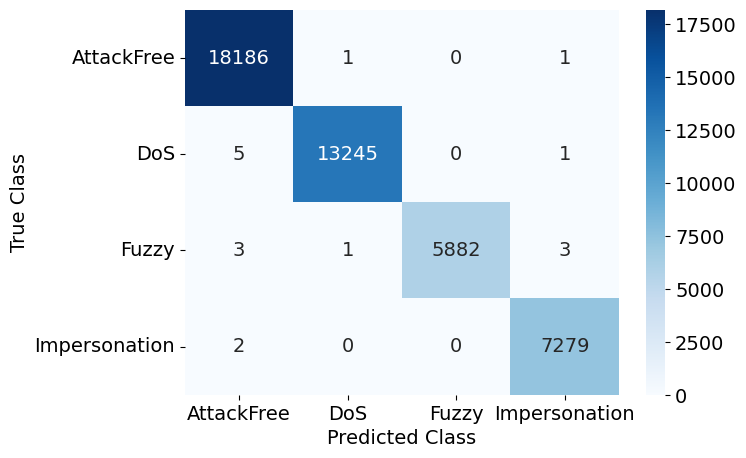

In [14]:
# Making the Confusion Matrix :DT
cm_dt = confusion_matrix(Y_Test, Y_Pred_dt)
cm_dt

import seaborn as sn
import matplotlib.pyplot as plt



font = {'family' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

label = ['AttackFree', 'DoS', 'Fuzzy', 'Impersonation']


df_cm_dt = pd.DataFrame(cm_dt, index = [i for i in label],
                  columns = [i for i in label])

plt.figure(figsize = (7,5))
sn.heatmap(df_cm_dt, annot=True, fmt='.0f', cmap='Blues')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

## DT Evaluation

In [15]:
#evaluation for DT

print("Accuracy:",metrics.accuracy_score(Y_Test, Y_Pred_dt))
print("Precision:",metrics.precision_score(Y_Test, Y_Pred_dt, average='micro'))
print("Recall:",metrics.recall_score(Y_Test, Y_Test, average='micro'))
print("F1_Score:",metrics.f1_score(Y_Test, Y_Test, average='micro'))
print("Cohen_Kappa_Score:",sklearn.metrics.cohen_kappa_score(Y_Test, Y_Pred_dt, labels=None, weights=None, sample_weight=None))
#print("MSE:",metrics.mean_squared_error(Y_Test,Y_Pred_svm))

Accuracy: 0.9996189109820888
Precision: 0.9996189109820888
Recall: 1.0
F1_Score: 1.0
Cohen_Kappa_Score: 0.999456690962917


In [16]:
# Individual Clasification - DT
print(classification_report(Y_Test, Y_Pred_dt))

"""
The classification report summarizes these metrics for each class individually and also
provides the weighted average (averaged across all classes, weighted by the number of true instances for each class)
and the macro average (averaged across all classes,
giving each class equal weight regardless of its size) of precision, recall, and F1-score.
"""

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     18188
           2       1.00      1.00      1.00     13251
           3       1.00      1.00      1.00      5889
           4       1.00      1.00      1.00      7281

    accuracy                           1.00     44609
   macro avg       1.00      1.00      1.00     44609
weighted avg       1.00      1.00      1.00     44609



'\nThe classification report summarizes these metrics for each class individually and also\nprovides the weighted average (averaged across all classes, weighted by the number of true instances for each class)\nand the macro average (averaged across all classes,\ngiving each class equal weight regardless of its size) of precision, recall, and F1-score.\n'

## Predicting on New Instances with DT
Here, we'll make predictions on new data instances or cases.

In [27]:
read_New = pd.read_csv('/content/drive/MyDrive/newdata.csv')[0:10]

read_New.iloc[:, 1]= label_encoder.fit_transform(read_New.iloc[:, 1])
read_New.iloc[:, 2]= label_encoder.fit_transform(read_New.iloc[:, 2])
read_New.iloc[:, 3]= label_encoder.fit_transform(read_New.iloc[:, 3])
read_New.iloc[:, 4]= label_encoder.fit_transform(read_New.iloc[:, 4])
read_New.iloc[:, 5]= label_encoder.fit_transform(read_New.iloc[:, 5])
read_New.iloc[:, 6]= label_encoder.fit_transform(read_New.iloc[:, 6])
read_New.iloc[:, 7]= label_encoder.fit_transform(read_New.iloc[:, 7])
read_New.iloc[:, 8]= label_encoder.fit_transform(read_New.iloc[:, 8])
read_New.iloc[:, 9]= label_encoder.fit_transform(read_New.iloc[:, 9])
read_New.iloc[:, 10]= label_encoder.fit_transform(read_New.iloc[:, 10])
read_New.iloc[:, 11]= label_encoder.fit_transform(read_New.iloc[:, 11])
read_New.iloc[:, 12]= label_encoder.fit_transform(read_New.iloc[:, 12])
read_New.iloc[:, 13]= label_encoder.fit_transform(read_New.iloc[:, 13])
read_New.iloc[:, 14]= label_encoder.fit_transform(read_New.iloc[:, 14])
read_New.iloc[:, 15]= label_encoder.fit_transform(read_New.iloc[:, 15])

# Feature Scaling for new instances - though this won't be needed
#sc_X = StandardScaler()
#X_New = sc_X.transform(read_New)

#X_New = []

In [ ]:
Y_Pred_single_instance = classifier_dt.predict(read_New)

print("Prediction for single instance:", Y_Pred_single_instance)

Prediction for single instance: [3 3 3 3 3 3 3 3 3 3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


## KNN Classifier

In [28]:
# KNN classifier
classifier_knn = neighbors.KNeighborsClassifier(n_neighbors=5,
                                                weights='uniform',
                                                algorithm='auto',
                                                leaf_size=30,
                                                p=2,
                                                metric='minkowski',
                                                metric_params=None,
                                                n_jobs=None)

start_time_1 = datetime.now()

classifier_knn.fit(X_Train, Y_Train)

end_time_1 = datetime.now()
print('Training Duration: {}'.format(end_time_1 - start_time_1))

# KNN Testing time
start_time_2 = datetime.now()

# Predicting the test set results
Y_Pred_knn = classifier_knn.predict(X_Test)

end_time_2 = datetime.now()
print('Testing Duration: {}'.format(end_time_2 - start_time_2))

Training Duration: 0:00:00.016067
Testing Duration: 0:00:36.081661


## KNN Confusion Matrix

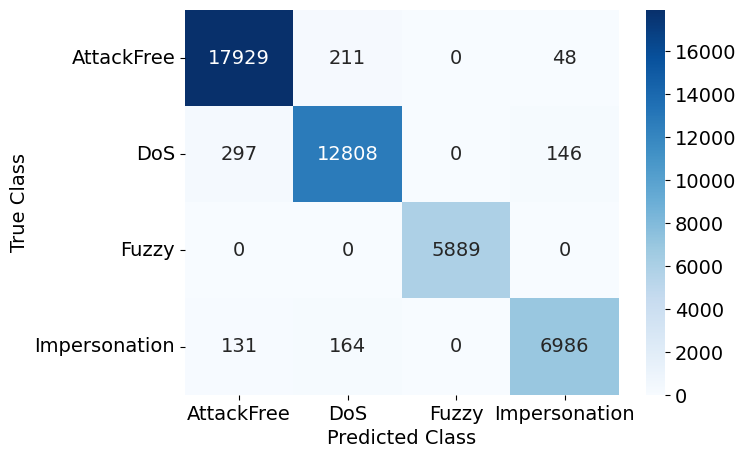

In [29]:
# Making the Confusion Matrix :knn
cm_knn = confusion_matrix(Y_Test, Y_Pred_knn)
cm_knn

font = {'family' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

df_cm_knn = pd.DataFrame(cm_knn, index = [i for i in label],
                  columns = [i for i in label])

plt.figure(figsize = (7,5))
sn.heatmap(df_cm_knn, annot=True, fmt='.0f', cmap='Blues')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

## KNN Evaluation

In [30]:
#evaluation for KNN
print("Accuracy:",metrics.accuracy_score(Y_Test, Y_Pred_knn))
print("Precision:",metrics.precision_score(Y_Test, Y_Pred_knn, average='micro'))
print("Recall:",metrics.recall_score(Y_Test, Y_Test, average='micro'))
print("F1_Score:",metrics.f1_score(Y_Test, Y_Test, average='micro'))
print("Cohen_Kappa_Score:",sklearn.metrics.cohen_kappa_score(Y_Test, Y_Pred_knn, labels=None, weights=None, sample_weight=None))

Accuracy: 0.9776502499495617
Precision: 0.9776502499495617
Recall: 1.0
F1_Score: 1.0
Cohen_Kappa_Score: 0.968105350391031


In [31]:
# Individual Clasification- KNN
print(classification_report(Y_Test, Y_Pred_knn))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98     18188
           2       0.97      0.97      0.97     13251
           3       1.00      1.00      1.00      5889
           4       0.97      0.96      0.97      7281

    accuracy                           0.98     44609
   macro avg       0.98      0.98      0.98     44609
weighted avg       0.98      0.98      0.98     44609



## Predicting New Instances with KNN

In [32]:
Y_Pred_single_instance = classifier_knn.predict(read_New)

print("Prediction for single instance:", Y_Pred_single_instance)

Prediction for single instance: [3 3 3 3 3 3 3 3 3 3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
